In [24]:
'''
import sys
!{sys.executable} -m pip install geopandas
#https://data.gov.tw/datasets/search?qs=dtid%3A667&order=downloadcount&type=dataset
#內政部國土測繪中心
#https://data.gov.tw/dataset/6047
#各縣市公司設立登記清冊
'''   
import os
import csv
import pandas as pd
import geopandas as gpd


path  = "company-test"
files=[]
data=[]
for r,d,f in os.walk(path):
    for file in f:
        files.append(os.path.join(r,file))
for f in files:
    print(f)
    year = f[-10:-6]
    month = f[-6:-4]  
    with open(f, 'r') as csvfile:
        r= csv.reader(csvfile, delimiter=',')
        for i,row in enumerate(r):
            if i == 1:
                #print(row)
                data.append({
                        'year':int(year),
                        'month': int(month),
                        'city': row[3][:3],
                        'capital': int(row[5])
                    })
#print(data)

company-test/201302.csv


In [25]:
#Apply pandas on company data
company_data = pd.DataFrame()
for f in files:
    if company_data.empty:
        company_data = pd.read_csv(f)
    else:
        company_data_new = pd.read_csv(f)
        frames = [company_data, company_data_new]
        company_data = pd.concat(frames)

company_data = company_data.drop(company_data.columns[[0,1,2,4,6]],axis=1)
#刪除資本額為零的公司
#for index, row in company_data.iterrows():
#    if row[1] == 0  :
#        company_data.drop(index, inplace=True)
#僅留下縣市名稱
company_data['公司所在地']=company_data['公司所在地'].apply(lambda t: t[:3])
company_data.head()

,公司所在地,資本額
0,臺南市,100000000
1,臺中市,0
2,桃園縣,0
3,臺中市,0
4,高雄市,1000000


In [26]:
counties_shp = gpd.read_file('mapdata201907311006/COUNTY_MOI_1080726.shp',encoding='utf-8')
countynames = counties_shp['COUNTYNAME']
#counties_shp = counties_shp.assign(Money=0.0)
#print(counties_shp.assign(Money=0.0))

In [27]:
#各縣市該月份的總共資本額（單位為百萬元）
MoneyDic={'County':[],'Money':[]}
for c in countynames:
    count = 0.0 # in million
    for index, row in company_data.iterrows():
        if row[0] == c :
            count += (float)(row[1])/1000000.0
    #print(c,round(count,2))
    MoneyDic['County'].append(c)
    MoneyDic['Money'].append(round(count,2))
    '''for index, row in counties_shp.iterrows():
        if row['COUNTYNAME'] == c:
            counties_shp.loc[index]['Money']=round(count,2)
            #s = pd.Series([round(count,2)], index=[index])
            #counties_shp = counties_shp.assign(Money=s)'''
money_merge = pd.DataFrame(MoneyDic)

In [28]:
print(money_merge)

   County    Money
0     連江縣     0.00
1     宜蘭縣   188.05
2     彰化縣   200.20
3     南投縣    58.40
4     雲林縣    98.35
5     屏東縣    36.76
6     澎湖縣     3.00
7     基隆市    19.35
8     新竹市    93.54
9     臺北市  3796.66
10    新北市  1390.74
11    臺中市  1165.50
12    臺南市   452.98
13    桃園市     0.00
14    苗栗縣   100.26
15    新竹縣   379.65
16    嘉義市    11.44
17    嘉義縣     9.10
18    金門縣     7.50
19    高雄市   508.37
20    臺東縣     4.30
21    花蓮縣    35.40


In [29]:
New_counties_shp=counties_shp.merge(money_merge,left_on=('COUNTYNAME'),right_on=('County'))
New_counties_shp


,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry,County,Money
0,Z,09007,連江縣,Lienchiang County,(POLYGON ((119.9644519140001 25.94552317400007...,連江縣,0.00
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...,宜蘭縣,188.05
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,...",彰化縣,200.20
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,...",南投縣,58.40
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12...",雲林縣,98.35
5,T,10013,屏東縣,Pingtung County,"(POLYGON ((120.379645899 22.35598933400007, 12...",屏東縣,36.76
6,X,10016,澎湖縣,Penghu County,(POLYGON ((119.4402533230001 23.22136844000005...,澎湖縣,3.00
7,C,10017,基隆市,Keelung City,"(POLYGON ((121.710150286 25.17604204900005, 12...",基隆市,19.35
8,O,10018,新竹市,Hsinchu City,"POLYGON ((120.9301072960001 24.85301711800008,...",新竹市,93.54
9,A,63000,臺北市,Taipei City,"POLYGON ((121.5709805050001 25.19716811600006,...",臺北市,3796.66


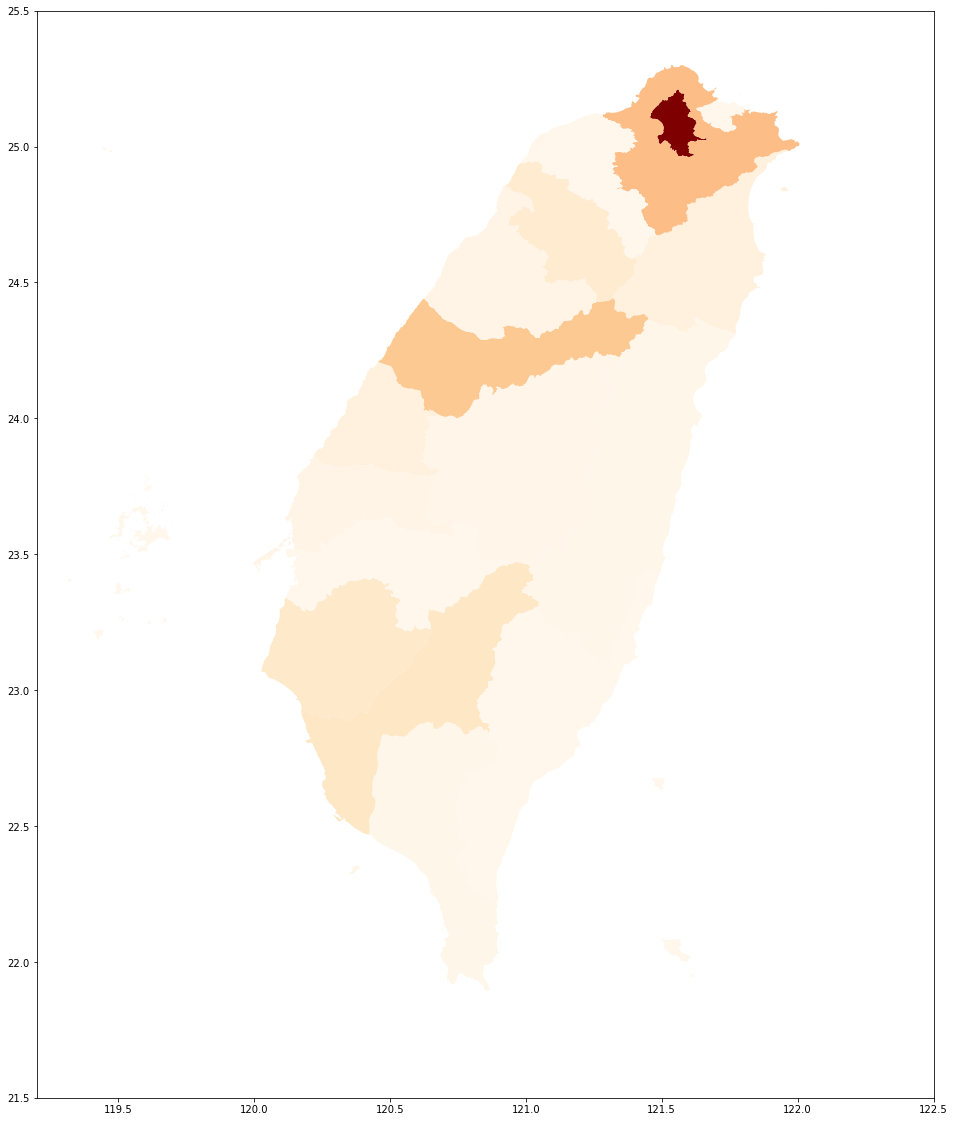

In [31]:
fig = New_counties_shp.plot(column='Money', cmap='OrRd')
ax = fig.axis((119.2,122.5,21.5,25.5))